# Telecom customer churn Prediction - Modeling

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import classifiers and utilities
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (roc_auc_score, roc_curve, confusion_matrix,
                             accuracy_score, f1_score, precision_score, recall_score)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import shap


import warnings
warnings.filterwarnings('ignore')

In [2]:
%run 02_preprocessing.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   float64
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [3]:
telecom_data

,Female,Male,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service - DSL,Internet Service - Fiber optic,...,Contract - Month-to-month,Paperless Billing,Payment Method - Mailed check,Payment Method - Electronic check,Payment Method - Bank transfer (automatic),Payment Method - Credit card (automatic),Monthly Charges,Total Charges,Churn Value,CLTV
0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,53.85,108.15,1,3239.0
1,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,70.70,151.65,1,2701.0
2,1.0,0.0,0.0,0.0,1.0,8.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,99.65,820.50,1,5372.0
3,1.0,0.0,0.0,1.0,1.0,28.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,104.80,3046.05,1,5003.0
4,0.0,1.0,0.0,0.0,1.0,49.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,103.70,5036.30,1,5340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,0.0,0.0,0.0,72.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,21.15,1419.40,0,5306.0
7039,0.0,1.0,0.0,1.0,1.0,24.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,84.80,1990.50,0,2140.0
7040,1.0,0.0,0.0,1.0,1.0,72.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,103.20,7362.90,0,5560.0
7041,1.0,0.0,0.0,1.0,1.0,11.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,29.60,346.45,0,2793.0


In [4]:
y = telecom_data['Churn Value']
X = telecom_data.drop('Churn Value',axis=1)
X

,Female,Male,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service - DSL,Internet Service - Fiber optic,...,Contract - Two year,Contract - Month-to-month,Paperless Billing,Payment Method - Mailed check,Payment Method - Electronic check,Payment Method - Bank transfer (automatic),Payment Method - Credit card (automatic),Monthly Charges,Total Charges,CLTV
0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,53.85,108.15,3239.0
1,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,70.70,151.65,2701.0
2,1.0,0.0,0.0,0.0,1.0,8.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,99.65,820.50,5372.0
3,1.0,0.0,0.0,1.0,1.0,28.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,104.80,3046.05,5003.0
4,0.0,1.0,0.0,0.0,1.0,49.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,103.70,5036.30,5340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,0.0,0.0,0.0,72.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,21.15,1419.40,5306.0
7039,0.0,1.0,0.0,1.0,1.0,24.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,84.80,1990.50,2140.0
7040,1.0,0.0,0.0,1.0,1.0,72.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,103.20,7362.90,5560.0
7041,1.0,0.0,0.0,1.0,1.0,11.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,29.60,346.45,2793.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [6]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2'],
            'solver': ['lbfgs']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42, class_weight='balanced'),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20]
        }
    },
    # 'Support Vector Machine': {
    #     'model': SVC(probability=True, random_state=42, class_weight='balanced'),
    #     'params': {
    #         'C': [0.1, 1, 10],
    #         'kernel': ['linear', 'rbf'],
    #         'gamma': ['scale', 'auto']
    #     }
    # },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
        'params': {
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    },
    'XGBoost': {
        'model': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 6, 10],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    },
    'LightGBM': {
        'model': lgb.LGBMClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [-1, 10, 20],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True, random_state=42),
        'params': {
            'iterations': [100, 200],
            'depth': [3, 6, 10],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    }
}


Training Logistic Regression...


/Users/jeeva/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jeeva/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

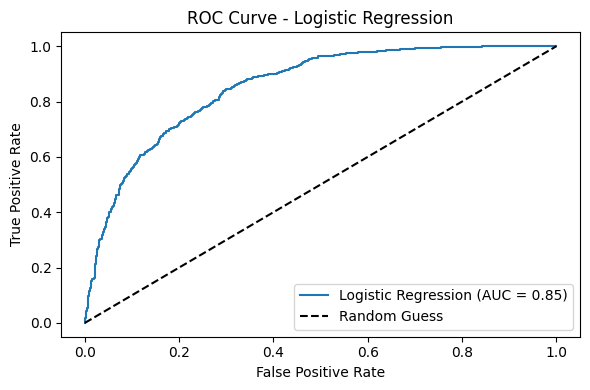

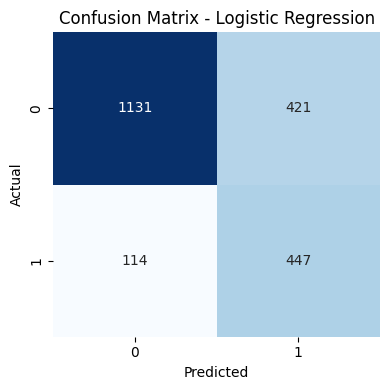

Training Random Forest...


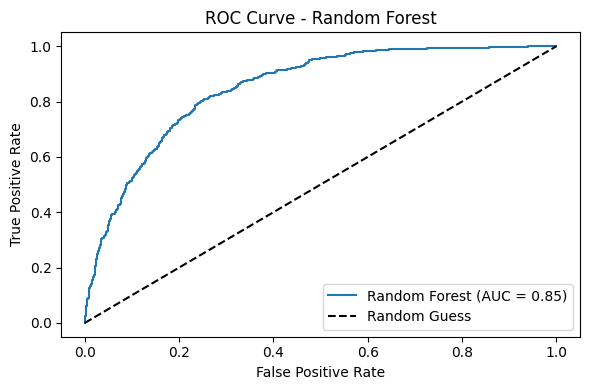

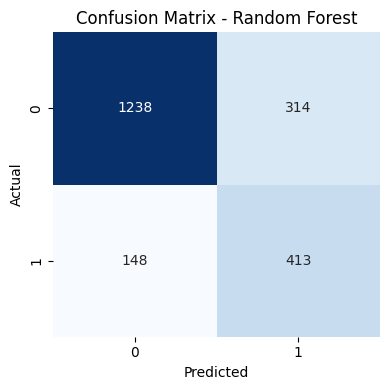

Training K-Nearest Neighbors...


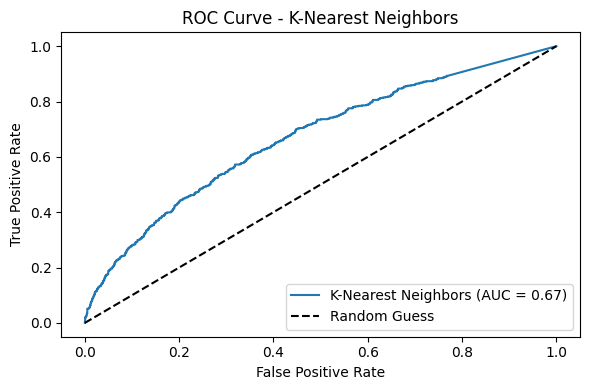

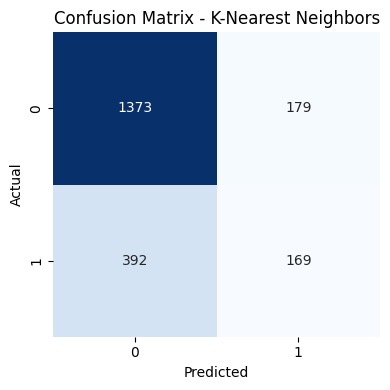

Training Decision Tree...


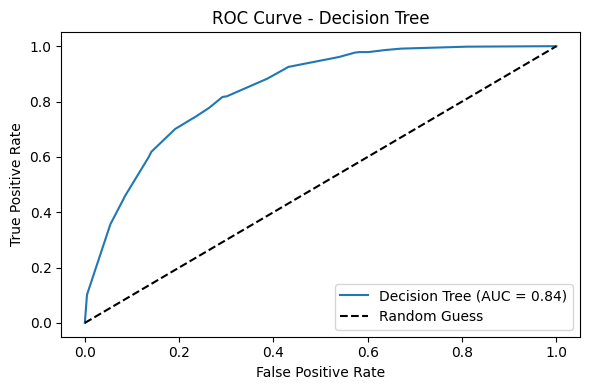

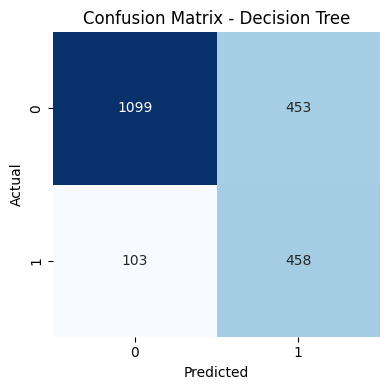

Training Gradient Boosting...


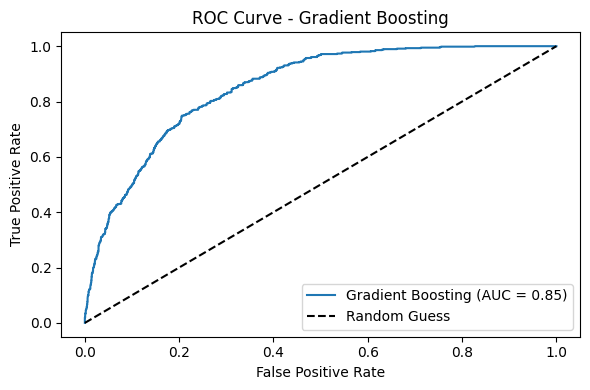

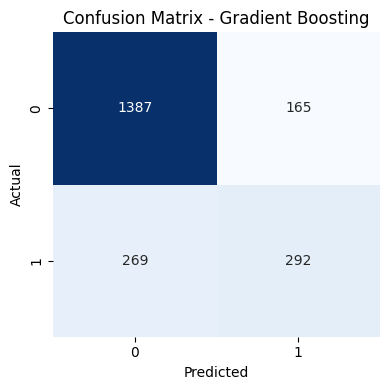

Training XGBoost...


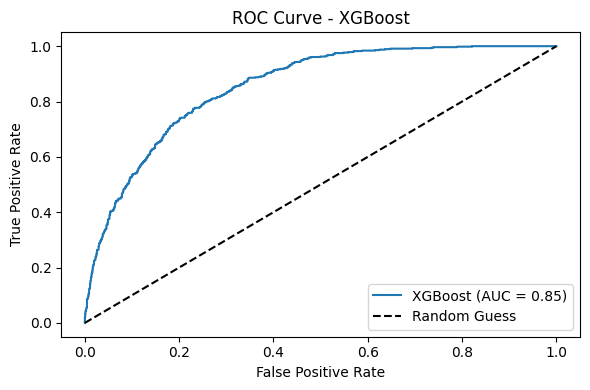

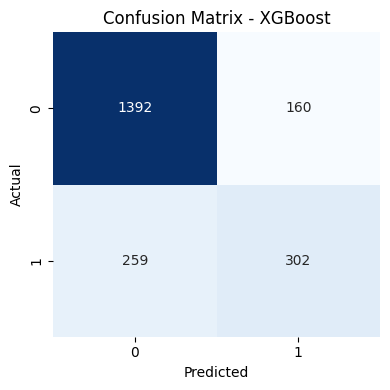

Training LightGBM...


/Users/jeeva/anaconda3/lib/python3.11/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/Users/jeeva/anaconda3/lib/python3.11/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/Users/jeeva/anaconda3/lib/python3.11/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/Users/

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1308, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 884
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265314 -> initscore=-1.018527
[LightGBM] [Info] Start training from score -1.018527


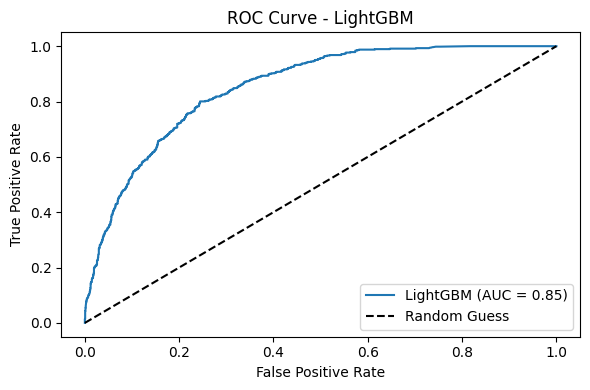

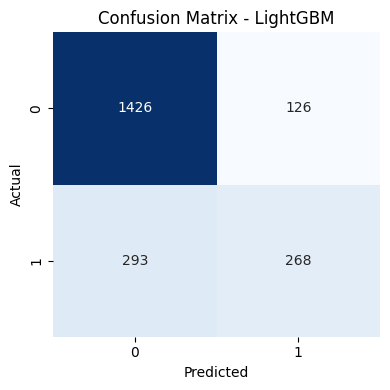

Training CatBoost...


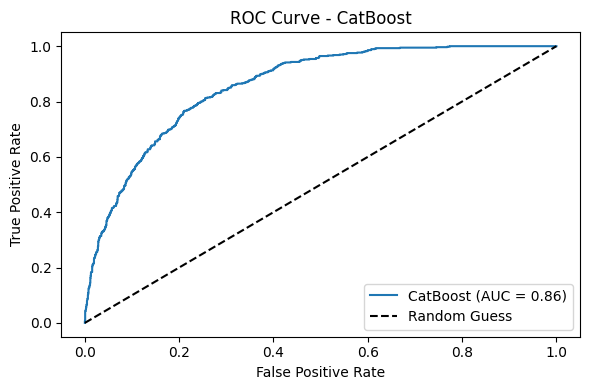

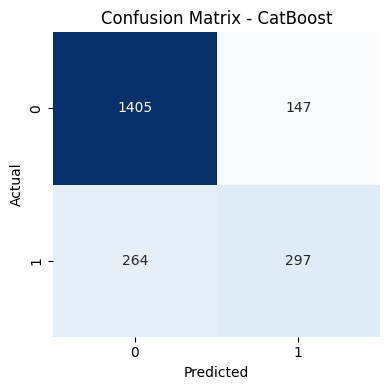

Hyperparameter Tuning and Evaluation Results:
                 Model                                        Best Params  \
0  Logistic Regression       {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}   
1        Random Forest             {'max_depth': 10, 'n_estimators': 200}   
2  K-Nearest Neighbors          {'n_neighbors': 7, 'weights': 'distance'}   
3        Decision Tree           {'max_depth': 5, 'min_samples_split': 2}   
4    Gradient Boosting  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...   
5              XGBoost  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...   
6             LightGBM  {'learning_rate': 0.01, 'max_depth': -1, 'n_es...   
7             CatBoost  {'depth': 3, 'iterations': 100, 'learning_rate...   

   Test AUC  Test Accuracy   Test F1  Test Precision  Test Recall  
0  0.853480       0.746805  0.625612        0.514977     0.796791  
1  0.850081       0.781354  0.641304        0.568088     0.736185  
2  0.668846       0.729768  0.371837        0.485632    

In [7]:
best_models = {}

results = []  # To store results for each model

for name, model_info in models.items():
    print(f"Training {name}...")
    
    grid = GridSearchCV(model_info['model'],
                        model_info['params'],
                        cv=5,
                        scoring='roc_auc',
                        n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    
    # Store the best model in our dictionary
    best_models[name] = best_model
    
    # Obtain predictions and predicted probabilities
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    y_pred = best_model.predict(X_test)
    
    # Calculate evaluation metrics
    auc = roc_auc_score(y_test, y_pred_proba)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Test AUC': auc,
        'Test Accuracy': acc,
        'Test F1': f1,
        'Test Precision': precision,
        'Test Recall': recall
    })
    
    # ----------------------------
    # Plot ROC Curve for this model
    # ----------------------------
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()
    
    # ----------------------------
    # Plot Confusion Matrix for this model
    # ----------------------------
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

results_df = pd.DataFrame(results)
print("Hyperparameter Tuning and Evaluation Results:")
print(results_df)

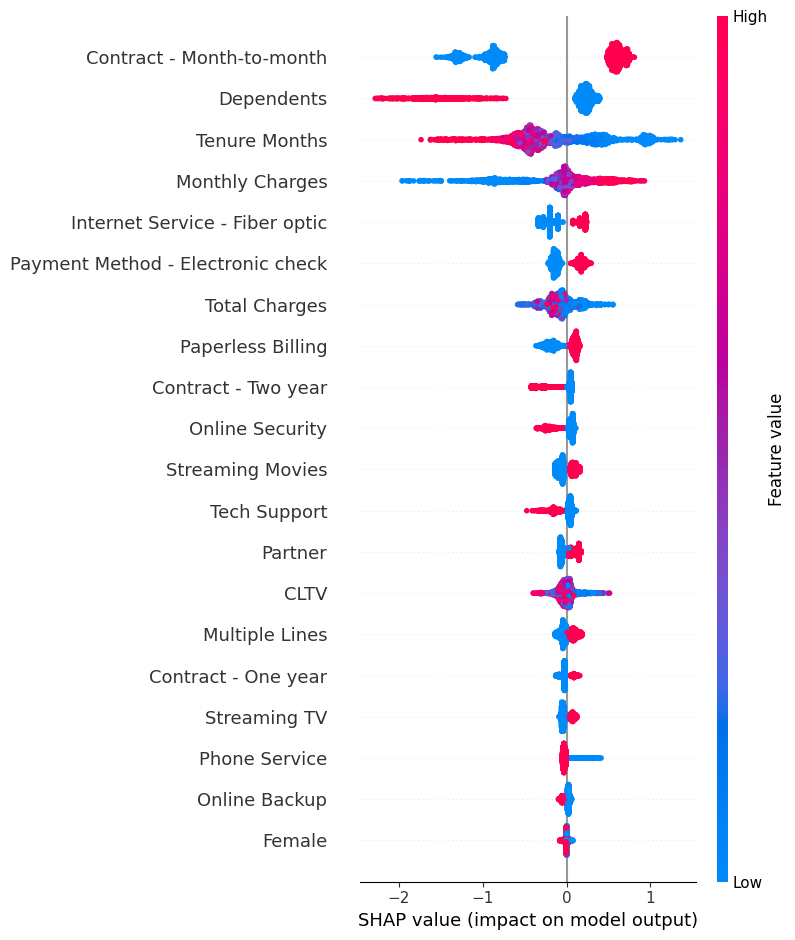

In [25]:
xgb_best = best_models["XGBoost"]
explainer = shap.TreeExplainer(xgb_best)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


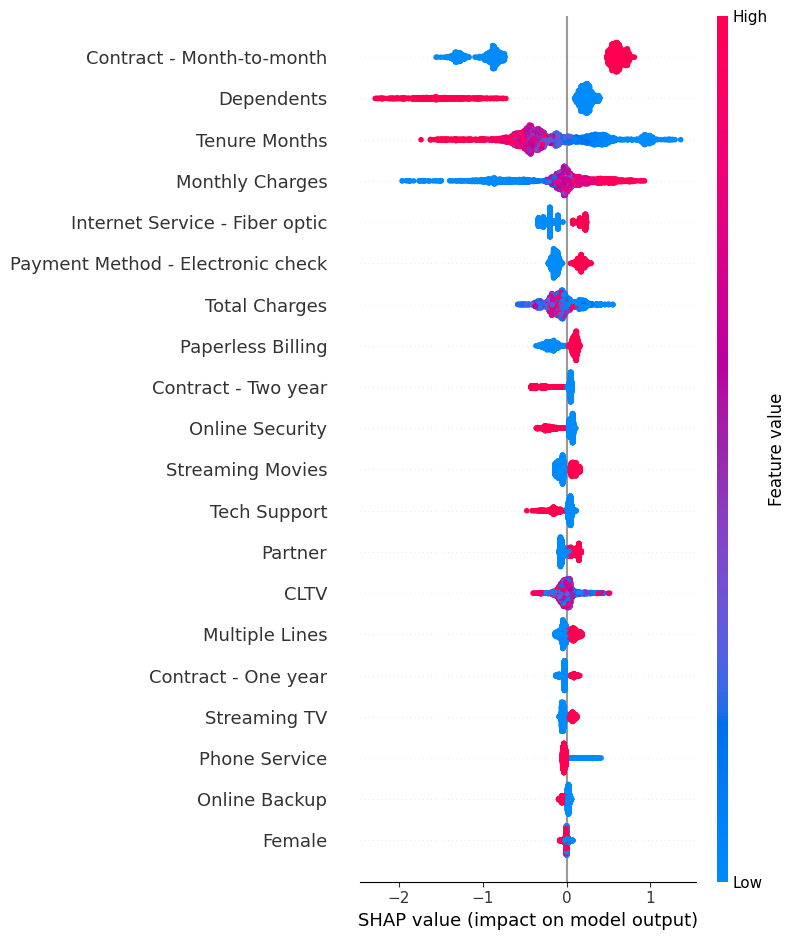

In [24]:
lgbm_best = best_models["LightGBM"]
explainer = shap.TreeExplainer(xgb_best)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)